In [1]:
import numpy as np
from boundedfbm import create_cell, CellType, FBM_BP
from sptanalysis.msd import MSD_Calculations_Track_Dict
import matplotlib.pyplot as plt

In [2]:
# 1. Create a cell to define boundaries
# 1. Create a cell to define boundaries
sphere_params = {
    "center": [5,5,5],
    "xradius": 2.0,
    "yradius": 3.0,
    "zradius": 1.0,
}
cell = create_cell(CellType.OVOID, sphere_params)
print(cell)
# 2. Set up FBM parameters
n_steps = 1000  # Number of time steps
dt = 0.01       # Time step in seconds

# Single diffusion coefficient and Hurst exponent (simple case)
diffusion_params = np.array([1.0]) # length units of the pyvista models, time units of dt
hurst_params = np.array([0.5])  # Superdiffusive

# For state transitions, set up identity matrices (no transitions)
# probabilities are represented for a dt time event. 
diff_transition = np.array([[1.0]])
hurst_transition = np.array([[1.0]])

# Initial state probabilities (single state)
diff_prob = np.array([1.0])
hurst_prob = np.array([1.0])

# Initial position, represents the initial position of motion in the pyvista model
initial_position = np.array([5,5,5])

# 3. Create the FBM simulator
fbm_simulator = FBM_BP(
    n=n_steps,
    dt=dt,
    diffusion_parameters=diffusion_params,
    hurst_parameters=hurst_params,
    diffusion_parameter_transition_matrix=diff_transition,
    hurst_parameter_transition_matrix=hurst_transition,
    state_probability_diffusion=diff_prob,
    state_probability_hurst=hurst_prob,
    cell=cell,
    initial_position=initial_position
)

# 4. Run the simulation
trajectory = fbm_simulator.fbm(dims=3)

OvoidCell(mesh=PolyData (0x1460066e0)
  N Cells:    19404
  N Points:   9704
  N Strips:   0
  X Bounds:   3.001e+00, 7.000e+00
  Y Bounds:   2.001e+00, 7.999e+00
  Z Bounds:   4.000e+00, 6.000e+00
  N Arrays:   2, center=[5, 5, 5], xradius=2.0, yradius=3.0, zradius=1.0)
Max iterations reached. Reflection may not have converged. Reflecting straight back into the cell center. p1: [4.20683521 3.81510716 4.17153236], p2: [3.93449709 3.57406339 4.29808547].
Max iterations reached. Reflection may not have converged. Reflecting straight back into the cell center. p1: [4.11236944 2.33113974 5.10642018], p2: [4.38932955 2.34201719 5.35668879].
Max iterations reached. Reflection may not have converged. Reflecting straight back into the cell center. p1: [3.45723135 3.10545131 5.07149526], p2: [3.50411356 3.06628254 4.82643814].


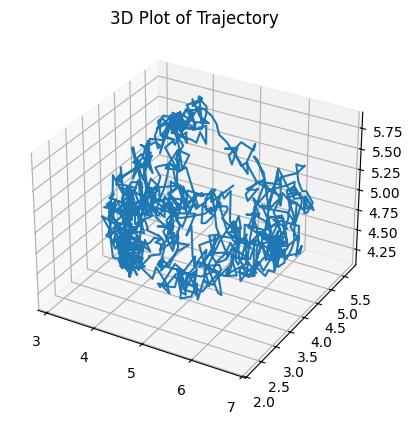

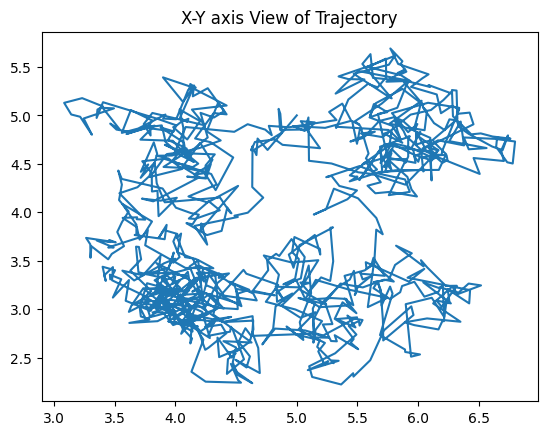

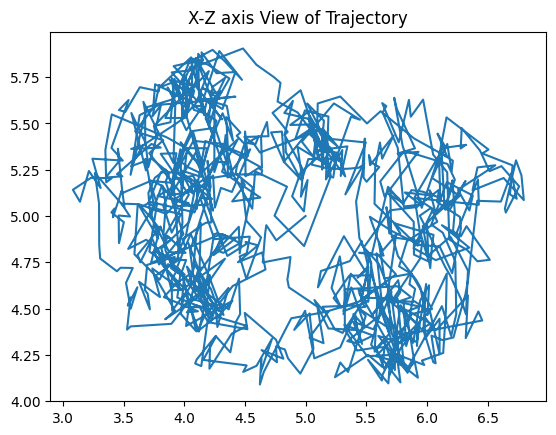

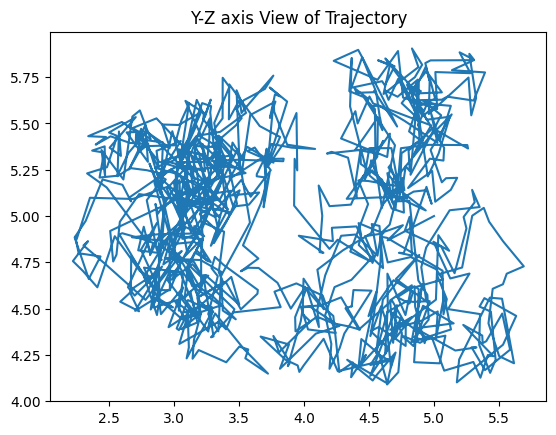

In [3]:
x = trajectory[:,0]
y = trajectory[:,1]
z = trajectory[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
ax.set_title("3D Plot of Trajectory")
plt.show()
plt.plot(x,y)
plt.title("X-Y axis View of Trajectory")
plt.show()
plt.plot(x,z)
plt.title("X-Z axis View of Trajectory")
plt.show()
plt.plot(y,z)
plt.title("Y-Z axis View of Trajectory")
plt.show()



In [4]:
tracks = {"1": trajectory}
msd = MSD_Calculations_Track_Dict(track_dict=tracks, pixel_to_um=1, frame_to_seconds=0.01, max_track_length = None)


        ##############################################################################################################
        #You have initialized a Calculation class with the following parameters:
        #pixel_size: 1
        #frame_length: 0.01
        #pixel_unit: um
        #frame_unit: s
        


In [5]:
track_msds = msd.individual_store.track_MSD

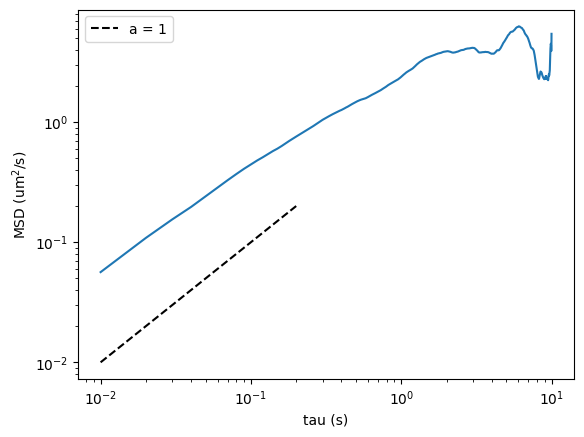

In [6]:
taus = track_msds['1'].keys()
msds = track_msds['1'].values()

plt.plot(list(taus)[:1000], list(msds)[:1000])
#plot 1:1 line
plt.plot(list(taus)[:20], list(taus)[:20], '--k', label = "a = 1")
plt.xlabel('tau')
plt.ylabel('MSD')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('MSD (um$^2$/s)')
plt.xlabel('tau (s)')
plt.legend()
plt.show()
